In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
# # Load the dataset (replace 'your_dataset.csv' with your actual file)
# data = pd.read_csv('../MergedData.csv')
# data.head()

# Load the dataset
df = pd.read_csv("../MergedData.csv")  # Replace with your actual file path
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (7623, 302)


,item.ait:process-info.ait:status.@state,item.ait:process-info.ait:status.@type,item.ait:process-info.ait:status.@stage,item.ait:process-info.ait:date-delivered.@day,item.ait:process-info.ait:date-delivered.@timestamp,item.ait:process-info.ait:date-delivered.@year,item.ait:process-info.ait:date-delivered.@month,item.ait:process-info.ait:date-sort.@day,item.ait:process-info.ait:date-sort.@year,item.ait:process-info.ait:date-sort.@month,...,item.bibrecord.tail.bibliography.reference.@aii:was-generated-by,item.bibrecord.tail.bibliography.reference.ref-info.ref-text,item.bibrecord.tail.bibliography.reference.ce:source-text,item.bibrecord.head.source.contributor-group.contributor,item.bibrecord.head.source.additional-srcinfo.reportinfo.reportnumber,item.bibrecord.head.enhancement.descriptorgroup.descriptors.@controlled,item.bibrecord.head.enhancement.descriptorgroup.descriptors.@type,item.bibrecord.head.enhancement.descriptorgroup.descriptors.descriptor,item.bibrecord.head.related-item.source.part,item.bibrecord.head.source.volisspag.pages
0,update,core,S300,23,2021-02-23T17:24:20.000020-05:00,2021,2,31,2018,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,update,core,S300,31,2021-07-31T11:32:34.000034-04:00,2021,7,31,2018,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,update,core,S300,13,2020-02-13T09:36:10.000010-05:00,2020,2,31,2018,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,update,core,S300,10,2020-02-10T17:30:52.000052-05:00,2020,2,30,2018,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,update,core,S300,7,2019-10-07T16:14:07.000007-04:00,2019,10,27,2018,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Convert 'Year' to datetime format
df['Year'] = pd.to_datetime(df['item.ait:process-info.ait:date-delivered.@year'], errors='coerce')
print(df['Year'].head())

# Create new features based on existing columns
df['Ref_Count'] = df['item.bibrecord.tail.bibliography.@refcount']
df['Subject_Count'] = df['subject-areas.subject-area'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
df['Keyword_Count'] = df['authkeywords.author-keyword'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Drop rows with missing values for the target or features
features = ['Ref_Count', 'Subject_Count', 'Keyword_Count']
target = 'coredata.citedby-count'
df = df.dropna(subset=features + [target])

print("Cleaned Dataset Shape:", df.shape)


0   1970-01-01 00:00:00.000002021
1   1970-01-01 00:00:00.000002021
2   1970-01-01 00:00:00.000002020
3   1970-01-01 00:00:00.000002020
4   1970-01-01 00:00:00.000002019
Name: Year, dtype: datetime64[ns]
Cleaned Dataset Shape: (7565, 306)


In [19]:
# Define features and target variables
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (6052, 3)
Test Set Shape: (1513, 3)


In [20]:
# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 14.143338237251225
R² Score: -0.5500939938784115


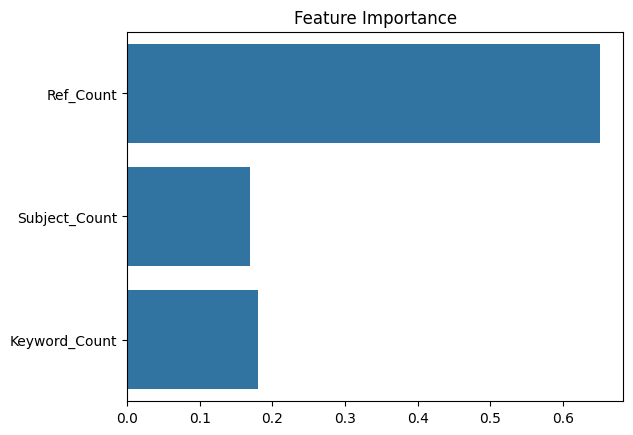

In [21]:
# Feature importance plot
importance = model.feature_importances_
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()